The Dataset is given by Kaggle from UCI Machine Learning Repositiory.

This Dataset separates patients with Malignant(M) and Benign tumor(B)

In [29]:
#import important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv(r"/content/breast-cancer-wisconsin-data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Performing normal EDA

In [31]:
df.shape

(569, 32)

In [32]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Informaton about the columns.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
# Dropping id column since it's of no use

df.drop(columns='id', inplace=True)

In [35]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [36]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [37]:
# here we are mapping M to 0 and B to 1 so that our model can function normally

d = {'M':0, 'B':1}
df['diagnosis'] = df['diagnosis'].map(d)
print(df)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            0        17.99         10.38          122.80     1001.0   
1            0        20.57         17.77          132.90     1326.0   
2            0        19.69         21.25          130.00     1203.0   
3            0        11.42         20.38           77.58      386.1   
4            0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          0        21.56         22.39          142.00     1479.0   
565          0        20.13         28.25          131.20     1261.0   
566          0        16.60         28.08          108.30      858.1   
567          0        20.60         29.33          140.10     1265.0   
568          1         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [38]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


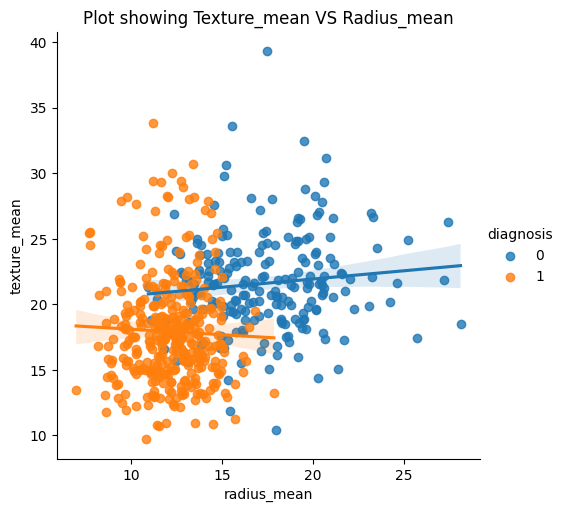

In [39]:
#plotting to observe the following columns

sns.lmplot(x='radius_mean', y = 'texture_mean', hue='diagnosis', data=df)
plt.title("Plot showing Texture_mean VS Radius_mean")
plt.show()

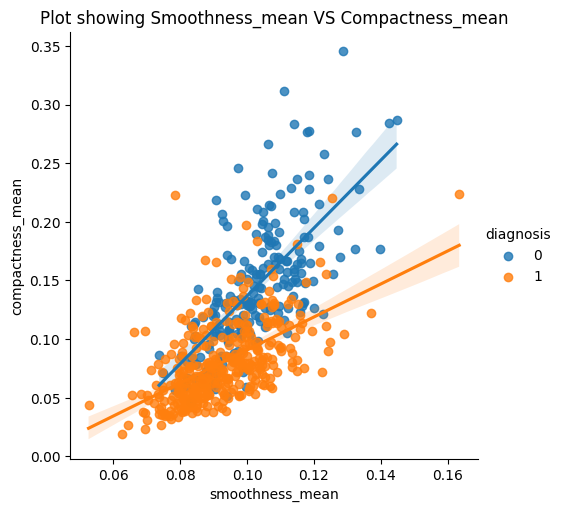

In [40]:
sns.lmplot(x='smoothness_mean', y = 'compactness_mean', hue='diagnosis', data=df)
plt.title("Plot showing Smoothness_mean VS Compactness_mean")
plt.show()

Feature Extraction

In [41]:
x = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])
x.shape, y.shape

((569, 30), (569,))

Splitting the data into training and testing.

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

Model building

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 13)      #Here we are assuming k=13 neighbors to be the most optimum for this dataset
knn.fit(x_train, y_train)                         #we will prove why 13 is the most optimum k value using cross validation

KNeighborsClassifier(n_neighbors=13)

In [46]:
# Model evaluation

knn.score(x_test, y_test)

0.9627659574468085

We got a score of 96% so we can say our model is an excellent model.

Performing Cross Validation.

In [47]:
from sklearn.model_selection import cross_val_score

neighbors = []
cv_scores = []

for k in range(1,51,2):
  neighbors.append(k)
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())

The optimal number of nrighbors is 13 


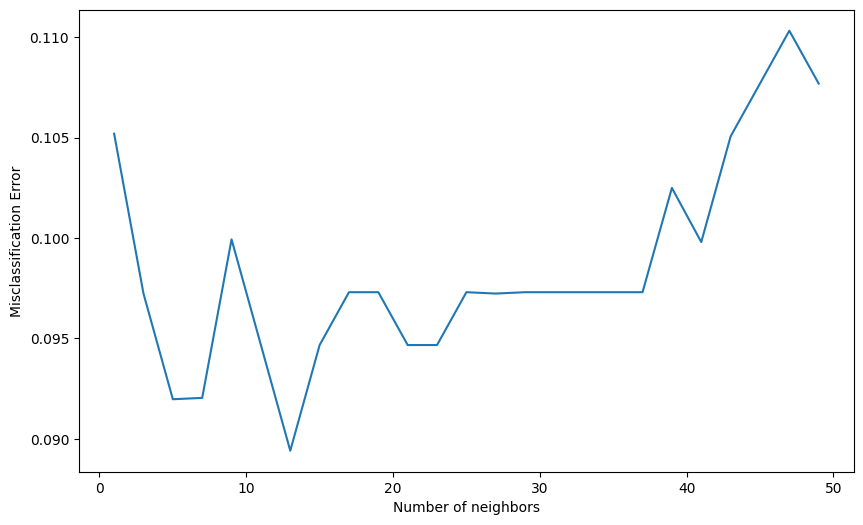

In [48]:
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of nrighbors is %d '% optimal_k)

plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

Therefore we can see that 13 is the most optimal k value.

Thanks a lot for going through my work till the end. Feel free to get in touch if you have any doubts... :)